In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
genetic_optimization_data = pd.read_csv("/Data to Gather - genetic optimization.csv")
genetic_optimization_data.head()

,evaluation,drum_1_angle,drum_2_angle,drum_3_angle,drum_4_angle,drum_5_angle,drum_6_angle,drum_7_angle,drum_8_angle,drum_9_angle,drum_10_angle,drum_11_angle,drum_12_angle,k_eff,abs_diff
0,1,-81.735490,-9.113476,-74.683493,8.156821,48.788580,-41.306646,-85.301776,68.009189,-16.612275,-48.226877,15.473765,18.579913,1.010477,0.010477
1,2,69.641916,-14.274104,-17.614952,15.759009,68.789213,36.203646,-55.398496,-4.397604,24.009764,20.971126,-70.342574,-43.895202,1.007918,0.007918
2,3,-15.205108,-65.364389,-54.728187,-33.667822,-66.121886,20.351668,82.945055,-5.864063,-8.983910,-42.648470,34.430786,41.730046,1.007031,0.007031
3,4,-77.083793,34.764521,-71.006611,26.463732,31.119335,-9.170679,-83.570147,28.780223,65.359145,30.885751,-79.464094,15.678114,1.011388,0.011388
4,5,-40.933810,-4.980191,21.491304,-46.586030,35.411966,-34.235715,38.192606,-12.332383,-60.314659,86.337476,50.332821,-39.917693,1.008850,0.008850


<Figure size 1200x800 with 0 Axes>

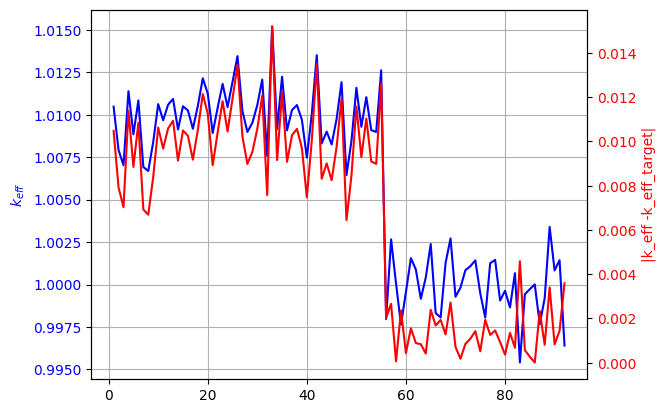

In [ ]:
#genetic optimization

plt.figure(figsize=(12,8))

fig, ax1 = plt.subplots()
ax1.plot(genetic_optimization_data['evaluation'],genetic_optimization_data['k_eff'],color = 'blue')
ax1.set_ylabel('$k_{eff}$', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.grid()

ax2 = ax1.twinx()
ax2.plot(genetic_optimization_data['evaluation'], genetic_optimization_data['abs_diff'],color = 'red')
ax2.set_ylabel('|k_eff -k_eff_target|',color='red')
ax2.tick_params(axis='y', labelcolor='red')

Text(0.5, 1.0, 'Keff vs. Control Drum Rotation Angle - Feedback Rotation')

<Figure size 1600x1600 with 0 Axes>

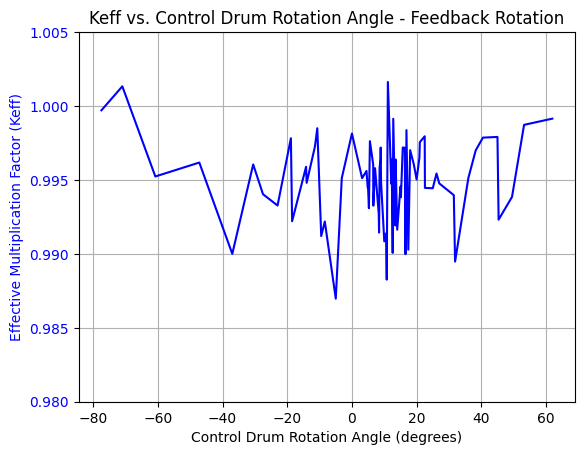

In [ ]:
angles = [
     -77.45858443, -70.99869102, -60.79885932, -47.19908372, -36.99925201,
    -30.5393586, -27.5, -23.0, -18.87755102, -18.5, -14.18388889, -14.0,
    -11.43888889, -10.71428571, -9.5, -8.388888889, -5.0, -3.142857143,
    0.0, 3.142857143, 4.5, 4.857142857, 5.0, 5.25, 5.555555556, 6.571428571,
    6.611111111, 7.142857143, 8.285714286, 8.388888889, 8.55, 8.857142857,
    8.888888889, 9.0, 10.0, 10.57142857, 10.7625, 11.11111111, 11.71428571,
    12.15432099, 12.28571429, 12.6, 12.77777778, 13.42857143, 13.5, 14.0,
    15.0, 15.14285714, 15.71428571, 16.33813443, 16.550625, 16.65,
    16.85714286, 17.42857143, 18.0, 19.14285714, 20.0, 20.85714286,
    20.98681603, 22.5, 22.57142857, 25.0, 26.15201782, 27.0, 31.5,
    31.89113091, 36.0, 38.26792323, 40.5, 45.0, 45.35324803, 49.5,
    53.22583115, 61.97314572
]

# Nominal Keff values
keff_nominal = [
    0.9997123899, 1.001333206, 0.9952356926, 0.9961772635, 0.990000692,
    0.9960502746, 0.9940344676, 0.9932708587, 0.9978229367, 0.9922083881,
    0.9958926219, 0.994805998, 0.9972627305, 0.9984976776, 0.9912062943,
    0.9921905738, 0.9869712394, 0.9951221728, 0.9981403317, 0.9951221728,
    0.9956084927, 0.9945196614, 0.9943812878, 0.9930916833, 0.9976238862,
    0.9960372212, 0.993260463, 0.9957954433, 0.9927248894, 0.9914400719,
    0.9958069235, 0.9964483323, 0.9971893295, 0.9948780304, 0.9908483174,
    0.99139044, 0.9882589766, 1.001628232, 0.9977775077, 0.9947448276,
    0.9963822017, 0.990066127, 0.9991376226, 0.9919222556, 0.9963833489,
    0.9916324299, 0.9945476437, 0.9938350163, 0.9971954088, 0.9971825358,
    0.9899819417, 0.9915720667, 0.9983694735, 0.9902881158, 0.9970173305,
    0.9960440081, 0.9950266015, 0.9965059228, 0.9975542238, 0.9979547693,
    0.9944624617, 0.994439032, 0.995438709, 0.9947695235, 0.9939719304,
    0.9894778776, 0.9951327612, 0.9969997777, 0.9978637466, 0.9979100957,
    0.9923157769, 0.9938551401, 0.9987272516, 0.999148292
]


# Norm
keff_norm = [
    0.0002876100567, 0.001333206272, 0.004764307414, 0.003822736512,
    0.009999307981, 0.003949725416, 0.0059655324, 0.006729141294,
    0.002177063276, 0.007791611904, 0.0041073781, 0.005194002037,
    0.002737269537, 0.001502322435, 0.008793705749, 0.007809426159,
    0.01302876064, 0.004877827238, 0.001859668309, 0.004877827238,
    0.004391507342, 0.005480338584, 0.005618712235, 0.006908316731,
    0.002376113817, 0.003962778809, 0.006739537042, 0.004204556678,
    0.007275110557, 0.008559928103, 0.00419307648, 0.003551667711,
    0.002810670468, 0.005121969567, 0.009151682619, 0.008609560007,
    0.01174102342, 0.00162823246, 0.002222492327, 0.005255172435,
    0.003617798283, 0.009933872994, 0.0008623773909, 0.008077744356,
    0.003616651128, 0.008367570072, 0.00545235634, 0.006164983721,
    0.002804591192, 0.002817464184, 0.0100180583, 0.008427933327,
    0.001630526516, 0.009711884176, 0.002982669537, 0.003955991946,
    0.004973398496, 0.003494077167, 0.00244577619, 0.0020452307,
    0.005537538258, 0.005560967951, 0.004561291036, 0.005230476501,
    0.006028069564, 0.01052212237, 0.004867238831, 0.003000222264,
    0.002136253435, 0.002089904334, 0.007684223063, 0.006144859903,
    0.001272748393, 0.0008517080332
]


plt.figure(figsize=(16,16))

fig, ax1 = plt.subplots()
ax1.plot(angles,keff_nominal,color = 'blue')
ax1.set_ylabel('$k_{eff}$', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.grid()

#ax2 = ax1.twinx()
#ax2.plot(angles, keff_norm,color = 'red')
#ax2.set_ylabel('|k_eff -k_eff_target|',color='red')
#ax2.tick_params(axis='y', labelcolor='red')

plt.ylim(0.98, 1.005)
plt.xlabel('Control Drum Rotation Angle (degrees)')
plt.ylabel('Effective Multiplication Factor (Keff)')
plt.title('Keff vs. Control Drum Rotation Angle - Feedback Rotation')

Text(0.5, 1.0, 'Keff vs. Control Drum Rotation Angle - Built In')

<Figure size 1600x1600 with 0 Axes>

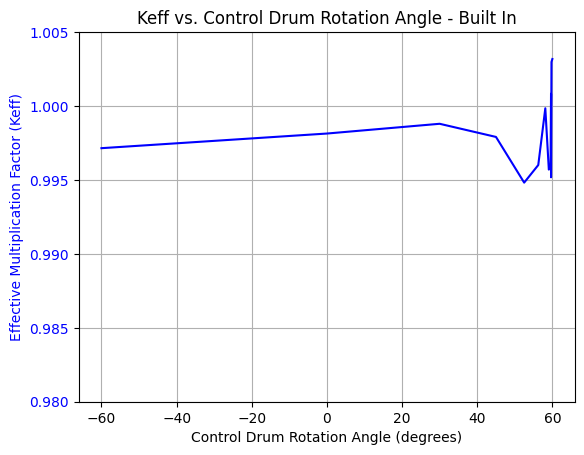

In [51]:
angles = [
     -60.0, 0.0, 30.0, 45.0, 52.5, 56.25, 58.125, 59.0625,
                 59.53125, 59.6484375, 59.6484375, 59.765625, 60.0
]

keff_nominal = [0.99715, 0.99814, 0.99880, 0.99791, 0.99482, 0.99601, 0.99985,
               0.99570, 0.99603, 1.00083, 0.99518, 1.00298, 1.00318
]
iteration = np.arange(1,len(keff_nominal))

plt.figure(figsize=(16,16))

fig, ax1 = plt.subplots()
ax1.plot(angles,keff_nominal,color = 'blue')
ax1.set_ylabel('$k_{eff}$', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.grid()

#ax2 = ax1.twinx()
#ax2.plot(angles, keff_norm,color = 'red')
#ax2.set_ylabel('|k_eff -k_eff_target|',color='red')
#ax2.tick_params(axis='y', labelcolor='red')

plt.ylim(0.98, 1.005)
plt.xlabel('Control Drum Rotation Angle (degrees)')
plt.ylabel('Effective Multiplication Factor (Keff)')
plt.title('Keff vs. Control Drum Rotation Angle - Built In')

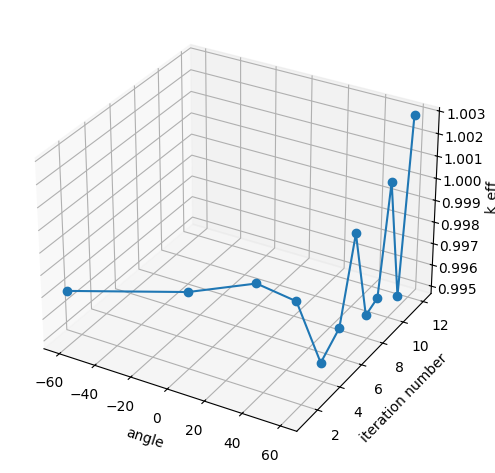

In [66]:
#openmc search for k_eff data
from mpl_toolkits.mplot3d import Axes3D

data = [
    (-60.0, 0.99715, 1),
    (0.0, 0.99814, 2),
    (30.0, 0.9988, 3),
    (45.0, 0.99791, 4),
    (52.5, 0.99482, 5),
    (56.25, 0.99601, 6),
    (58.125, 0.99985, 7),
    (59.0625, 0.9957, 8),
    (59.53125, 0.99603, 9),
    (59.6484375, 1.00083, 10),
    (59.6484375, 0.99518, 11),
    (59.765625, 1.00298, 12)
]

x, y, z = zip(*data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, z, y, marker='o')

ax.set_xlabel('angle')
ax.set_ylabel('iteration number')
ax.set_zlabel('k_eff')

plt.tight_layout()
plt.show()


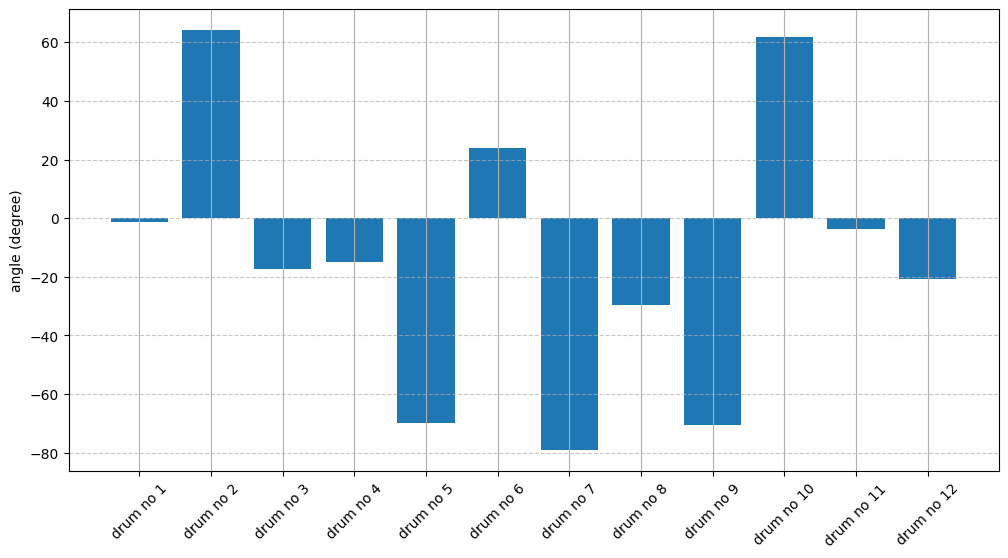

In [64]:
#89th evolution

angles_ga = [-1.371714686, 64.06917014, -17.23011365, -14.9609442,
          -69.72462107, 23.82573943, -79.19105094, -29.60914295,
          -70.51408575, 61.87619544, -3.805245732, -20.70025735]

drum_list = [f"drum no {i+1}" for i in range(len(angles_ga))]

plt.figure(figsize=(12, 6))
bars = plt.bar(drum_list, angles_ga)
plt.ylabel("angle (degree)")
plt.xticks(rotation=45)
plt.grid()
plt.grid(axis='y', linestyle='--', alpha=0.7)

